In [ ]:
%reset -f
%load_ext autoreload
%autoreload 2
from mechanics import LagrangeSystem, S

system = (
    LagrangeSystem()
    .add_index('n', 1, 2)
    .add_coordinate(r'\theta', index='n', space=S)
    .add_constant('m g')
    .add_constant('l', index='n')
    .define('x y', 'l * cos(theta), l * sin(theta)', ('n', 1))
    .define('x y', 'x[1] + l * cos(theta), y[1] + l * sin(theta)', ('n', 2))
    .define('T', 'm/2 * (diff(x, t)**2 + diff(y, t)**2)', sum_for='n')
    .define('U', 'm * g * y', sum_for='n')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
)
system.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
system.latex(system.eval('L'))

'- \\left(2 l_{1} \\sin{\\left(\\theta_{1} \\right)} + l_{2} \\sin{\\left(\\theta_{2} \\right)}\\right) g m + \\frac{\\left(2 {l_{1}}^2 \\dot{\\theta_{1}}^{2} + 2 l_{1} l_{2} \\cos{\\left(\\theta_{1} - \\theta_{2} \\right)} \\dot{\\theta_{1}} \\dot{\\theta_{2}} + {l_{2}}^2 \\dot{\\theta_{2}}^{2}\\right) m}{2}'

In [3]:
from mechanics.integrator import Euler
system_d = (
    system.discretization()
    .add_constant('N h')
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(Euler('h'))
    .doit()
)
system_d.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Unknowns: [\dot{\theta}(2, i), y(n, i), T(i,), E(i,), \theta(2, i), U(i,), \ddot{\theta}(1, i), \ddot{\theta}(2, i), x(n, i), \theta(1, i), \dot{\theta}(n, i + 1), {k_{\ddot{\theta}}}(n, i), {k_{\dot{\theta}}}(n, i), \theta(n, i + 1), t(i,), L(i,), \dot{\theta}(1, i)]
Variables: (\theta(n, i), \dot{\theta}(n, i), \ddot{\theta}(n, i), {k_{\dot{\theta}}}(n, i), {k_{\ddot{\theta}}}(n, i), t(i,), x(n, i), y(n, i), T(i,), U(i,), L(i,), E(i,))
[(i,), (n, i), (n, i), (i,), (i,), (i,), (i,), (n, i), (i,), (i,), (n, i), (n, i)]


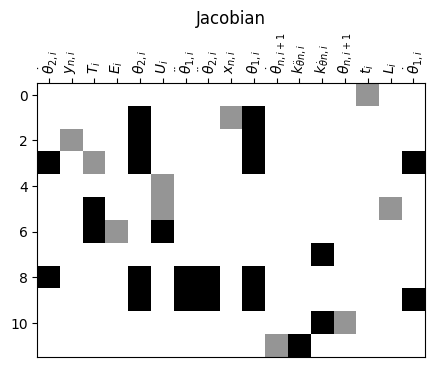

In [4]:
solver = system_d.solver()
solver.plot_jacobian()